In [35]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("out.csv")
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.856710,35.154225,10026.881258,18.920483,225.965194,12.982573,8.324390,16.069256,0.664484,11.102286,4.945670,0.141843,0.133288,0.160243
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.905000,8.215000,1900.000000,76.400000,38.500000,3.380000,0.190000,71.985000,2.000000,12.725000,5.975000,0.040000,0.200000,0.443500
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.050000,5600.000000,90.300000,181.600000,10.530000,1.080000,85.380000,2.000000,18.900000,8.170000,0.116000,0.282000,0.565283
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.980000,55.335000,15700.000000,97.800000,382.900000,20.000000,4.557111,95.230000,2.319512,29.770000,10.580000,0.211000,0.335000,0.671500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [37]:
df.drop(["Country","Region"], axis=1, inplace= True)
df.values

array([[3.1056997e+07, 6.4750000e+05, 4.8000000e+01, ..., 3.8000000e-01,
        2.4000000e-01, 3.8000000e-01],
       [3.5816550e+06, 2.8748000e+04, 1.2460000e+02, ..., 2.3200000e-01,
        1.8800000e-01, 5.7900000e-01],
       [3.2930091e+07, 2.3817400e+06, 1.3800000e+01, ..., 1.0100000e-01,
        6.0000000e-01, 2.9800000e-01],
       ...,
       [2.1456188e+07, 5.2797000e+05, 4.0600000e+01, ..., 1.3500000e-01,
        4.7200000e-01, 3.9300000e-01],
       [1.1502010e+07, 7.5261400e+05, 1.5300000e+01, ..., 2.2000000e-01,
        2.9000000e-01, 4.8900000e-01],
       [1.2236805e+07, 3.9058000e+05, 3.1300000e+01, ..., 1.7900000e-01,
        2.4300000e-01, 5.7900000e-01]])

In [51]:
def PCA(X):
    
    #calculate the mean and substract from the features
    X_mean = np.mean(X, axis = 0).reshape(1,-1) 
    
    #Centered the columns 
    C =( X - X_mean ) / np.std(X , axis = 0)
    
    #Calculate the covariance matrix 
    V = np.cov(C.T)
    print(V.shape)
    
    #Calculate eignvalues and eignvestors
    eignvalues ,eignvestors = np.linalg.eig(V)
    norm = eignvalues / sum(eignvalues)
    cumulative_sum_eignvalue = np.cumsum(norm)
    
    return cumulative_sum_eignvalue , eignvestors

In [52]:
pca , eignvestors = PCA(df.values)

(18, 18)


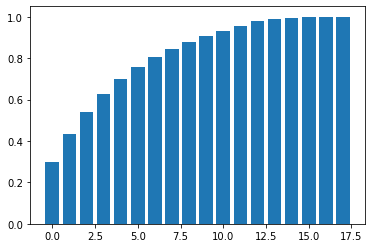

In [53]:
#draw eginvalues
plt.bar(list(range(pca.shape[0])), height = pca, width = 0.8 )
plt.show()

In [64]:
P = np.dot(df, eignvestors[:12].T)
P.shape
P = pd.DataFrame(P)
P

,0,1,2,3,4,5,6,7,8,9,10,11
0,328128.844130,-326508.923695,-3.309734e+06,-2.077576e+06,-2.421426e+06,1.215309e+07,-1.063936e+07,-1.051696e+07,-1.144190e+07,-1.804989e+06,7.066971e+05,1.092157e+06
1,36965.827990,-28790.748832,-3.773167e+05,-2.446391e+05,-2.675703e+05,1.404094e+06,-1.218382e+06,-1.214092e+06,-1.314045e+06,-2.287385e+05,6.053809e+04,1.534357e+05
2,371024.360774,-638718.116607,-3.669449e+06,-1.963273e+06,-3.088481e+06,1.280591e+07,-1.159841e+07,-1.108031e+07,-1.231477e+07,-1.186324e+06,1.512404e+06,1.749795e+05
3,115.557689,1200.269494,-5.963821e+03,-1.454470e+03,-8.516649e+03,2.331486e+04,-1.960126e+04,-1.837275e+04,-2.022834e+04,-5.360080e+03,4.237827e+02,4.110561e+03
4,-137.802087,3486.284116,-7.460219e+03,9.626983e+02,-1.533019e+04,2.950736e+04,-2.407870e+04,-2.114888e+04,-2.383432e+04,-8.119233e+03,5.128114e+01,6.533328e+03
...,...,...,...,...,...,...,...,...,...,...,...,...
222,25146.473194,-17967.408409,-2.577524e+05,-1.706091e+05,-1.784367e+05,9.650446e+05,-8.344398e+05,-8.350351e+05,-9.014690e+05,-1.627763e+05,3.552075e+04,1.131045e+05
223,6034.756696,-45861.535433,-5.362996e+04,2.126509e+04,-1.059997e+05,9.526790e+04,-1.422166e+05,-8.018655e+04,-1.275852e+05,9.423380e+04,1.228410e+05,-1.397633e+05
224,227760.194759,-239465.790921,-2.294204e+06,-1.423931e+06,-1.697728e+06,8.392321e+06,-7.365475e+06,-7.262435e+06,-7.913503e+06,-1.212409e+06,5.245083e+05,7.077928e+05
225,128539.071904,-209640.312720,-1.274114e+06,-6.972533e+05,-1.053848e+06,4.476581e+06,-4.036348e+06,-3.873730e+06,-4.292954e+06,-4.481814e+05,4.926035e+05,1.069074e+05


In [65]:
P.to_csv("new_out.csv")